In [36]:
import pandas as pd
import numpy as np
import seaborn as sns

In [37]:
df=pd.read_csv("capstone_3.csv")

In [38]:
df.head()

,price,km,kw,previous_owners,warranty,nr._of_doors,nr._of_seats,displacement,weight,emission_class,...,color_of_upholstery_Beige,color_of_upholstery_Black,color_of_upholstery_Blue,color_of_upholstery_Brown,color_of_upholstery_Grey,color_of_upholstery_Orange,color_of_upholstery_Other,color_of_upholstery_Red,color_of_upholstery_White,color_of_upholstery_Yellow
0,15770.0,56013.0,66.0,2.0,0.0,5.0,5.0,1422.0,1220.0,6.0,...,0,1,0,0,0,0,0,0,0,0
1,14500.0,80000.0,141.0,1.0,0.0,3.0,4.0,1798.0,1255.0,6.0,...,0,0,0,0,1,0,0,0,0,0
2,14640.0,83450.0,85.0,1.0,0.0,4.0,4.0,1598.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0
3,14500.0,73000.0,66.0,1.0,0.0,3.0,4.0,1422.0,1195.0,6.0,...,0,1,0,0,0,0,0,0,0,0
4,16790.0,16200.0,66.0,1.0,0.0,5.0,5.0,1422.0,1135.0,6.0,...,0,1,0,0,0,0,0,0,0,0


In [39]:
df=pd.get_dummies(df,columns=["previous_owners"],prefix=["pr_ow"])


In [40]:
df=pd.get_dummies(df,columns=["nr._of_doors"],prefix=["doors"])

In [41]:
df=pd.get_dummies(df,columns=["gears"],prefix=["gears"])

In [42]:
df=pd.get_dummies(df,columns=["nr._of_seats"],prefix=["seats"])

In [43]:
df=pd.get_dummies(df,columns=["emission_class"],prefix=["e_class"])

In [44]:
df.head()

,price,km,kw,warranty,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,...,gears_9.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
0,15770.0,56013.0,66.0,0.0,1422.0,1220.0,0.038,99.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1
1,14500.0,80000.0,141.0,0.0,1798.0,1255.0,0.056,129.0,0.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,14640.0,83450.0,85.0,0.0,1598.0,1135.0,0.038,99.0,0.0,0.0,...,0,0,0,1,0,0,0,0,0,1
3,14500.0,73000.0,66.0,0.0,1422.0,1195.0,0.038,99.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,1
4,16790.0,16200.0,66.0,0.0,1422.0,1135.0,0.041,109.0,1.0,1.0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
sil=df[(df.price > 45000) | (df.price <8000)].index

In [46]:
df.drop(index=sil,axis=0,inplace=True)

In [47]:
df.price.max()

44970.0

In [48]:
df.price.min()

8000.0

In [49]:
from sklearn import preprocessing

In [50]:
scaler=preprocessing.MinMaxScaler()

In [51]:
x_std=(df.km-df.km.min())/(df.km.max()-df.km.min())



In [52]:
#df.km=x_std

In [53]:
#df.kw=(df.kw-df.kw.min())/(df.kw.max()-df.kw.min())

In [54]:
#df.warranty=(df.warranty-df.warranty.min())/(df.warranty.max()-df.warranty.min())

In [55]:
#df.weight=(df.weight-df.weight.min())/(df.weight.max()-df.weight.min())

In [56]:
#df.displacement=(df.displacement-df.displacement.min())/(df.displacement.max()-df.displacement.min())

In [57]:
#df.co2_emission_=(df.co2_emission_-df.co2_emission_.min())/(df.co2_emission_.max()-df.co2_emission_.min())

In [58]:
df.head()
df2=df

In [59]:
df.drop([
"color_of_upholstery_Orange","color_of_upholstery_Other",
"color_of_upholstery_Red","color_of_upholstery_White",
"color_of_upholstery_Yellow",'color_of_upholstery_Beige',
'color_of_upholstery_Black', 'color_of_upholstery_Blue',
'color_of_upholstery_Brown', 'color_of_upholstery_Grey',
"comfort_&_convenience_8_electric_tailgate","body_type_Coupe",
"body_type_Other","body_color_Violet","warranty","body_color_Gold",
"make_model_Renault Duster","vat_Price negotiable",'warranty',"gears_9.0"],axis=1,inplace=True)

In [60]:
df2_corr=abs(df.corr())

In [61]:
df2_des=df.describe().T
df2_des

,count,mean,std,min,25%,50%,75%,max
price,13854.0,18119.508517,6348.368440,8000.0,13500.00,17250.0,21900.0,44970.0
km,13854.0,26203.577306,28383.009704,0.0,979.25,18500.0,39000.0,114912.0
kw,13854.0,86.685073,22.169873,44.0,66.00,85.0,100.0,150.0
displacement,13854.0,1405.794716,271.774366,898.0,1197.00,1422.0,1598.0,2000.0
weight,13854.0,1327.062365,183.622834,900.0,1165.00,1285.0,1425.0,1905.0
...,...,...,...,...,...,...,...,...
seats_6.0,13854.0,0.000072,0.008496,0.0,0.00,0.0,0.0,1.0
seats_7.0,13854.0,0.018334,0.134161,0.0,0.00,0.0,0.0,1.0
e_class_4.0,13854.0,0.000144,0.012015,0.0,0.00,0.0,0.0,1.0
e_class_5.0,13854.0,0.003826,0.061735,0.0,0.00,0.0,0.0,1.0


C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

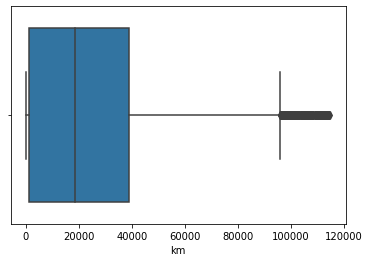

In [62]:
sns.boxplot(df.km)

In [63]:
Q1=df.km.quantile(0.25)
Q3=df.km.quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
print(alt_sinir,ust_sinir)

-56051.875 96031.125


In [64]:
asi=df[(df.km>(ust_sinir))].index
df.drop(index=asi,axis=0,inplace=True)

C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='km'>

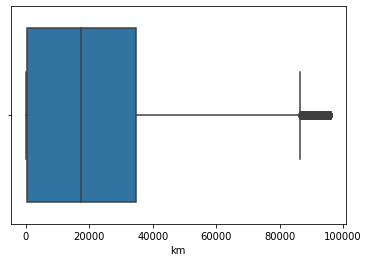

In [65]:
sns.boxplot(df.km)

In [66]:
df.describe()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
count,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,...,13405.000000,13405.000000,13405.000000,13405.000000,13405.000000,13405.0,13405.000000,13405.000000,13405.000000,13405.000000
mean,18253.261171,23589.032078,86.391048,1398.592615,1323.736069,0.047831,116.502275,0.506154,0.590228,0.734278,...,0.012160,0.004252,0.000075,0.081164,0.896233,0.0,0.018277,0.000149,0.003805,0.996046
std,6378.655278,24912.930599,22.238561,270.989635,183.203927,0.007999,16.018191,0.499981,0.491810,0.441733,...,0.109602,0.065072,0.008637,0.273097,0.304970,0.0,0.133955,0.012214,0.061566,0.062757
min,8000.000000,0.000000,44.000000,898.000000,900.000000,0.030000,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,13750.000000,300.000000,66.000000,1197.000000,1163.000000,0.041000,104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,17490.000000,17500.000000,85.000000,1422.000000,1278.000000,0.048000,114.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,21990.000000,34701.000000,100.000000,1598.000000,1425.000000,0.054000,127.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,44970.000000,96000.000000,150.000000,2000.000000,1905.000000,0.075000,164.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [67]:
Q1=df.km.quantile(0.25)
Q3=df.km.quantile(0.75)
IQR=Q3-Q1
alt_sinir=Q1-1.5*IQR
ust_sinir=Q3+1.5*IQR
print(alt_sinir,ust_sinir)

-51301.5 86302.5


In [68]:
asi=df[(df.km>(ust_sinir))].index
df.drop(index=asi,axis=0,inplace=True)


C:\Users\49159\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


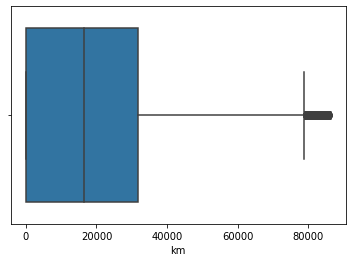

In [69]:
sns.boxplot(df.km);

In [70]:
df.describe()

,price,km,kw,displacement,weight,consumption_combi,co2_emission_,comfort_&_convenience_3_armrest,comfort_&_convenience_4_automatic_climate_control,comfort_&_convenience_6_cruise_control,...,gears_8.0,seats_2.0,seats_3.0,seats_4.0,seats_5.0,seats_6.0,seats_7.0,e_class_4.0,e_class_5.0,e_class_6.0
count,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,...,13021.000000,13021.000000,13021.000000,13021.000000,13021.000000,13021.0,13021.000000,13021.000000,13021.000000,13021.000000
mean,18363.574610,21602.261501,86.210583,1392.421396,1320.718378,0.047986,116.683818,0.503034,0.588204,0.733431,...,0.012441,0.004378,0.000077,0.081945,0.895553,0.0,0.018048,0.000154,0.003533,0.996314
std,6408.136665,22381.076030,22.320949,270.621048,182.621154,0.007980,15.981478,0.500010,0.492178,0.442182,...,0.110849,0.066021,0.008764,0.274291,0.305851,0.0,0.133129,0.012393,0.059334,0.060606
min,8000.000000,0.000000,44.000000,898.000000,900.000000,0.030000,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,13890.000000,150.000000,66.000000,1197.000000,1163.000000,0.041000,104.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
50%,17690.000000,16423.000000,85.000000,1422.000000,1276.000000,0.048000,115.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
75%,22167.000000,31679.000000,100.000000,1598.000000,1425.000000,0.054000,127.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000
max,44970.000000,86300.000000,150.000000,2000.000000,1905.000000,0.075000,164.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [71]:
df.to_csv("Captan_v1.csv",index=False)